<img src="fireblaze.jpg" width=250 height=200 />

# Assignment

### The problem statement

* **Classify the private and public universities by using K-Means clustering**

<span style='color:Red'> **About The Dataset** </span>

* **private:** A factor with levels No and Yes indicating private or public university.

* **apps:** Number of applications received.

* **accept:** Number of applications accepted. 

* **enroll:** Number of new students enrolled.  

* **top10perc:** Pct. new students from top 10% of H.S. class.

* **top25perc:** Pct. new students from top 25% of H.S. class.

* **f_undergrad:** Number of full-time undergraduates.

* **p_undergrad:** Number of part time undergraduates. 

* **outstate:** Out-of-state tuition.

* **room_board:** Room and board costs

* **Books:** Estimated book costs

* **Personal:**	Estimated personal spending

* **PhD:** Pct. of faculty with Ph.D.’s

* **Terminal:**	Pct. of faculty with terminal degree

* **S.F.Ratio:** Student/faculty ratio

* **perc.alumni:**	Pct. alumni who donate

* **Expend:** Instructional expenditure per student

* **Grad.Rate:** Graduation rate

<span style='color:Blue'> **Import the Required Libraries** </span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

<span style='color:Blue'> **Question - 1. Review the data sets and view the top lines.** </span>

In [2]:
data = pd.read_csv("college_data.csv")
data.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# 1. Exploratory data analysis

<span style='color:Blue'> **Question - 2. Explore the data to gain insights about the data.** </span>


In [3]:
data.shape

(777, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [5]:
data.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


<span style='color:Blue'> **Question - 5.How to verify missing values within variables and any missed count it.**</span>

In [6]:
data.isnull().sum()

private        0
apps           0
accept         0
enroll         0
top10perc      0
top25perc      0
f_undergrad    0
p_undergrad    0
outstate       0
room_board     0
books          0
personal       0
phd            0
terminal       0
s_f_ratio      0
perc_alumni    0
expend         0
grad_rate      0
dtype: int64

# 2. Exploratory Data Analysis (EDA)

<span style='color:Blue'> **Question - 6. How many students give the room based on grade. Plot the scatter plot and classify based on universities.**</span>

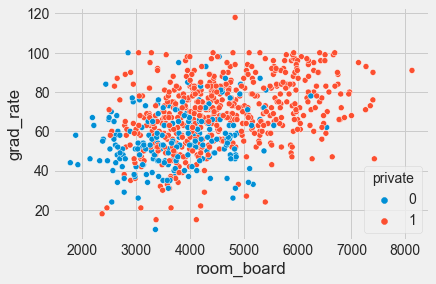

In [41]:
sns.scatterplot(x='room_board', y='grad_rate', data=data, hue='private')
plt.show()

<span style='color:Blue'> **Question - 7. How many students he/she out side station and join the full time undergraduates,plot the scatter plot based on unversities.**</span>

/Users/aniruddhakalbande/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='outstate', ylabel='f_undergrad'>

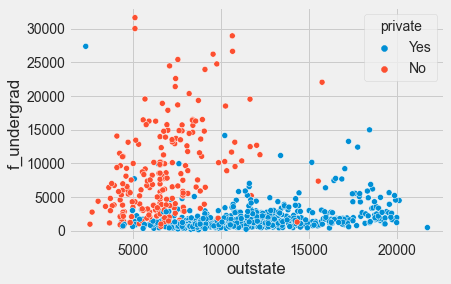

In [8]:
sns.scatterplot('outstate', 'f_undergrad', data=data, hue='private')

<span style='color:Blue'> **Question - 8. Plot the sctter plot of private vs non private universities based on outstate students.**</span>

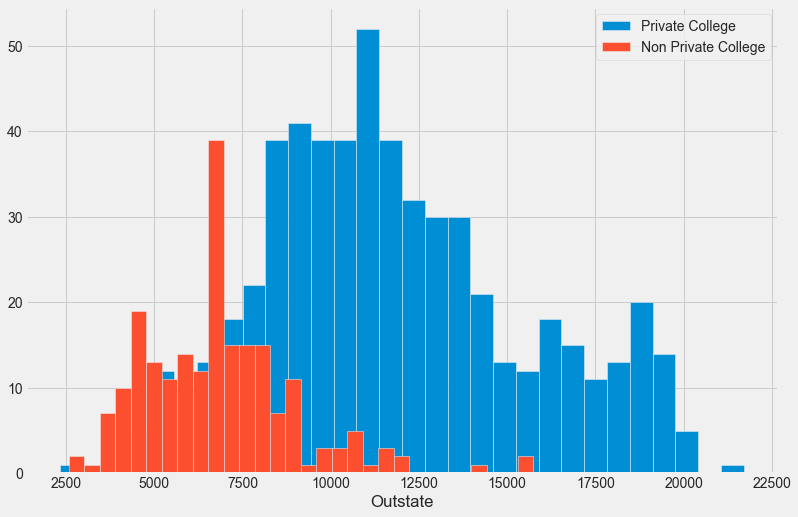

In [9]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'outstate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'outstate'].hist(label="Non Private College", bins=30)

plt.xlabel('Outstate')
plt.legend()

<span style='color:Blue'> **Question - 9. Plot the scatter plot based on grid rate vs private and non-private college.**</span>

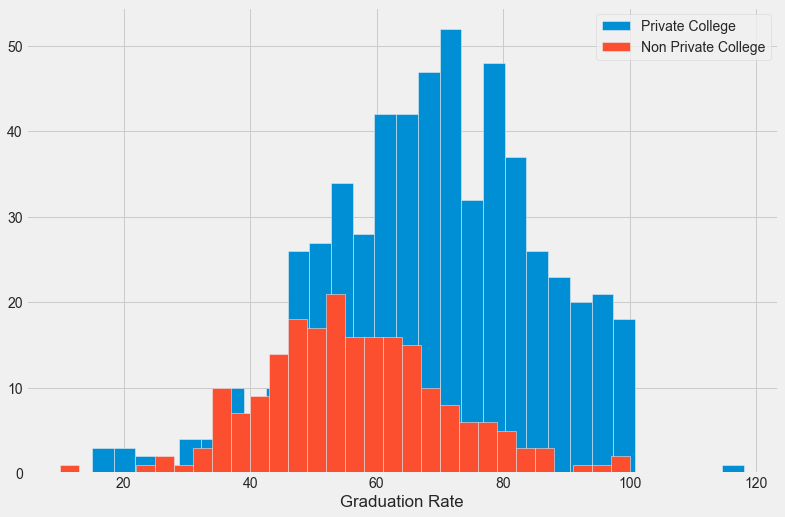

In [10]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

<span style='color:Blue'> **Question - 10. What is the name of that school who seems to be a private school with graduation rate of higher than 100%..**</span>

In [11]:
data.loc[data.grad_rate > 100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


<span style='color:Blue'> **Question - 11. Given data is in same range or not. If not how to arange?.**</span>

In [12]:
from sklearn import preprocessing
import seaborn as sns

In [13]:
#exclude the categorical column and the college names
features = data.drop(['private'], axis=1)

In [14]:
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(features)

In [15]:
pd.DataFrame(features_normal).describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,0.060830,0.074141,0.117189,0.279564,0.514249,0.113030,0.039125,0.418423,0.406294,0.202041,0.166510,0.680634,0.732930,0.310716,0.355373,0.122046,0.513549
std,0.080607,0.093347,0.146166,0.185688,0.217635,0.153962,0.069724,0.207800,0.172871,0.073576,0.103370,0.171875,0.193715,0.106122,0.193622,0.098437,0.159053
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.014475,0.020260,0.032563,0.147368,0.351648,0.027076,0.004305,0.257231,0.286412,0.166667,0.091603,0.568421,0.618421,0.241287,0.203125,0.067205,0.398148
50%,0.030763,0.039531,0.062765,0.231579,0.494505,0.049771,0.016121,0.395145,0.381463,0.180036,0.145038,0.705263,0.763158,0.297587,0.328125,0.097857,0.509259
75%,0.073793,0.089573,0.136385,0.357895,0.659341,0.122715,0.044241,0.546746,0.515448,0.224599,0.221374,0.810526,0.894737,0.375335,0.484375,0.144099,0.629630
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<span style='color:Blue'> **Question - 12. Do the histogram visualization grade rate vs private and non-private college**</span>

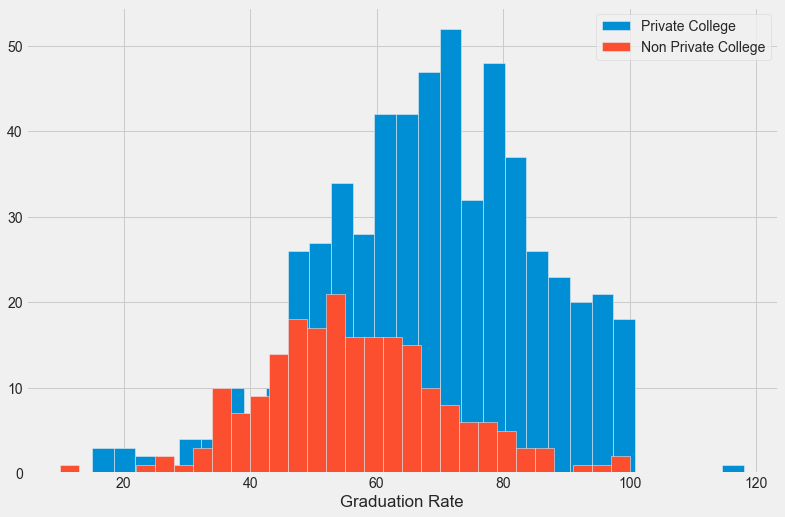

In [16]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

# 3. Clustering Model

<span style='color:Blue'> **Import the clustering Libraries** </span>

In [17]:
from sklearn.cluster import KMeans

<span style='color:Blue'> **Question - 13. Train the clustering model and Fit the model to all the data except for the Private label.**</span>

In [18]:
kmeans = KMeans(2)

In [19]:
kmeans.fit(data.drop('private', axis=1))

KMeans(n_clusters=2)

<span style='color:Blue'> **Question - 14. Find out best value of K by using graph**</span>

In [20]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(features_normal)
    kmeanModel.fit(features_normal)
    inertia.append(kmeanModel.inertia_)

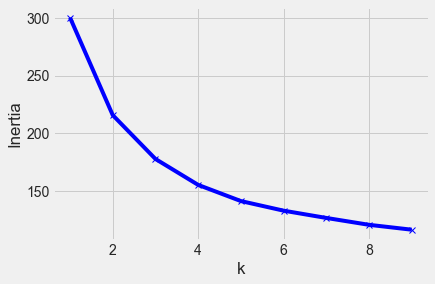

In [21]:


# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

# 4. Evaluation

<span style='color:Blue'> **Question - 15. Is it perfectly classified? If yes how to evaluate? Which method used?**</span>

In [22]:
data['private'] = data.private.astype("category").cat.codes

In [23]:
data.private

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: private, Length: 777, dtype: int8

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(data.private, kmeans.labels_))
print(classification_report(data.private, kmeans.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



<span style='color:Blue'> **Question - 16. What is f1-score?**</span>

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(data.private, kmeans.labels_))
print(pd.DataFrame(classification_report(data.private, kmeans.labels_, output_dict=True)))

0.22136422136422138
                    0           1  accuracy   macro avg  weighted avg
precision    0.206278    0.314815  0.221364    0.260546      0.285201
recall       0.650943    0.060177  0.221364    0.355560      0.221364
f1-score     0.313280    0.101040  0.221364    0.207160      0.158949
support    212.000000  565.000000  0.221364  777.000000    777.000000


# 5. Improve the Accuracy

<span style='color:Blue'> **Question - 17. What was the best 'K' value? Use these values and train the model?**</span>

In [26]:
# Create an instance of a K Means model with 4 clusters
kmeans=KMeans(n_clusters=4)

In [27]:
# Fit the model to all the data except for the Private label.
kmeans.fit(features_normal)

KMeans(n_clusters=4)

<span style='color:Blue'> **Question - 18. What are the cluster center vectors?**</span>

In [28]:

kmeans.cluster_centers_

array([[0.02513406, 0.03354147, 0.05637293, 0.15331957, 0.34216764,
        0.05250376, 0.02694376, 0.29983609, 0.32512682, 0.19298085,
        0.17099686, 0.53629171, 0.56910045, 0.334043  , 0.26919935,
        0.07409017, 0.4335512 ],
       [0.16064331, 0.20594442, 0.35555487, 0.25202761, 0.54305531,
        0.3811975 , 0.13205599, 0.25158854, 0.32983534, 0.21667982,
        0.24489926, 0.78127696, 0.84609577, 0.39783765, 0.22284836,
        0.09123876, 0.4263813 ],
       [0.12074125, 0.10802794, 0.15079946, 0.65505142, 0.87141594,
        0.1259643 , 0.01470801, 0.76564251, 0.60407698, 0.22177147,
        0.12549969, 0.87646703, 0.94086509, 0.19709716, 0.57758621,
        0.30503204, 0.69295445],
       [0.036149  , 0.04893325, 0.0660641 , 0.31514665, 0.5832145 ,
        0.05455505, 0.01818724, 0.51931345, 0.47101788, 0.19925569,
        0.13838646, 0.73732423, 0.80253114, 0.28063156, 0.44394084,
        0.13163813, 0.5879983 ]])

In [29]:
labels = pd.DataFrame(kmeans.labels_)

<span style='color:Blue'> **Question - 19. Indentify the summary of prediction results.**</span>

In [30]:
print(confusion_matrix(data.private,labels))


[[ 78 115   7  12]
 [228   7  80 250]
 [  0   0   0   0]
 [  0   0   0   0]]


<span style='color:Blue'> **Question - 20. It is possible to seperate out the dataset in two different classes?**</span>

NOTE:- Create a two seperate clusters based on class.

In [31]:
from sklearn.decomposition import PCA

In [32]:
# Here we compress the data to two dimension
pca=PCA(n_components=2)
principalComponents = pca.fit_transform(features_normal)

In [33]:
principalComponents

array([[-0.25428761,  0.10818427],
       [-0.46712183, -0.37943817],
       [-0.18759522, -0.23060028],
       ...,
       [-0.12106165,  0.03255907],
       [ 1.26189481, -0.08952944],
       [-0.05161981,  0.03696946]])

In [34]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [35]:
PCA_components.head()

,0,1
0,-0.254288,0.108184
1,-0.467122,-0.379438
2,-0.187595,-0.230600
3,0.620420,-0.129399
4,-0.419202,0.030048


In [36]:
k_means2=KMeans(n_clusters=2)

In [37]:
# Compute cluster centers and predict cluster indices 
X_clustered=k_means2.fit_predict(PCA_components)

In [38]:
# Define your own color map
Label_color_map={0:'r',1:'g'}
label_color=[Label_color_map[i] for i in X_clustered]

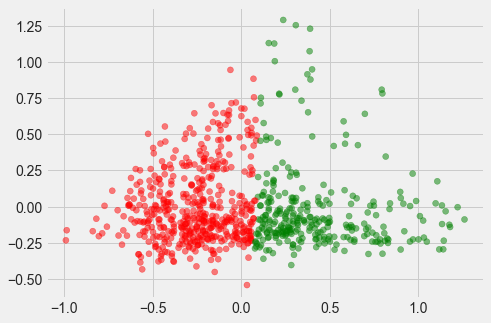

In [39]:
# Plot the scatter diagram
plt.figure(figsize=(7,5))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=label_color,alpha=0.5)
plt.show()